## Clustering of the digits dataset

We use divisive gater to cluster the digits dataset. Note that we use UMAP to preprocess the data.

In [1]:
from divisivegater.gater import Gater
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from umap import UMAP
import warnings
warnings.filterwarnings('ignore')

Load the digits dataset `X` and the target names `y`

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

In [3]:
# Import PCA module
from sklearn.decomposition import PCA
# Fit and transform PCA
pca = PCA(n_components=min(X.shape)).fit(X)
print('explained_variance_ratio', np.cumsum(pca.explained_variance_ratio_))
X = pca.transform(X)

explained_variance_ratio [0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430312 0.9031985  0.91116973 0.91884467 0.9260737
 0.93303259 0.9389934  0.94474955 0.94990113 0.95479652 0.9590854
 0.96282146 0.96635421 0.96972105 0.97300135 0.97608455 0.97902234
 0.98158823 0.98386565 0.98608843 0.98820273 0.99010182 0.99168835
 0.99319995 0.99460574 0.99577196 0.99684689 0.99781094 0.99858557
 0.99914278 0.99954711 0.99975703 0.99983951 0.99989203 0.99994255
 0.99997555 0.99998798 0.99999503 0.99999804 0.99999911 0.99999966
 1.         1.         1.         1.        ]


Use UMAP to visualize the 
[digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) dataset.

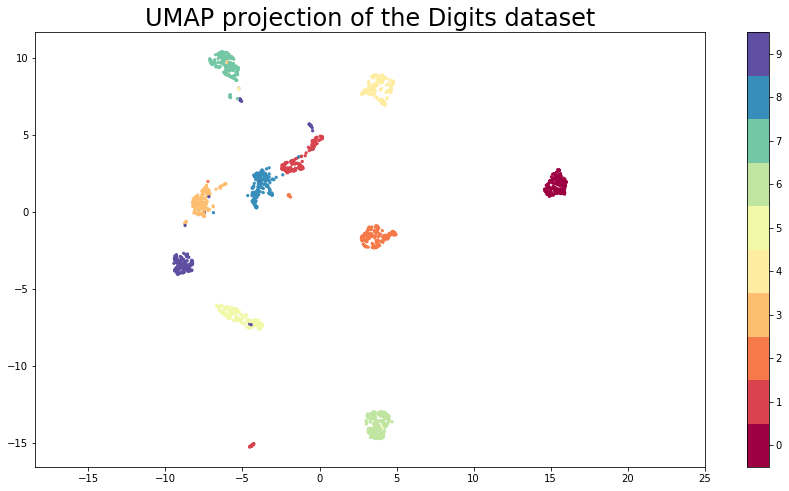

In [4]:
reducer = UMAP(random_state=42)
reducer.fit(X)
Y = reducer.transform(X)

plt.figure(figsize=(15,8))
plt.scatter(Y[:, 0], Y[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

Create a gater object, populate it with the digits data and choose to use all features ('markers'). The `set_markers` method also does preprocessing with UMAP. 

In [5]:
gater = Gater(distance_function='supremum_distance')
gater.data = pd.DataFrame(X)
gater.set_markers(scale=False)

Plot a histogram of how many outliers there will be for different numbers of clusters. 

Be patient. This is where the hard work is done. It takes a few minutes.

In [6]:
%%time
gater.plot_outlier_histogram()

CPU times: user 55 s, sys: 31.1 s, total: 1min 26s
Wall time: 25.9 s


Choose the desired number of clusters.

In [15]:
n_clusters = 10

Plot a histogram of cluster sizes. Note that the right most black cluster consists of outliers.

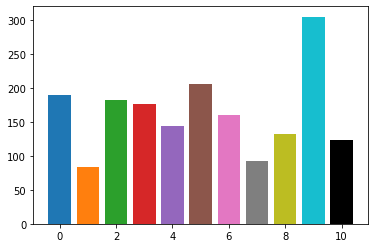

In [16]:
gater.plot_cluster_histogram(n_clusters=n_clusters)

Plot the clusters.

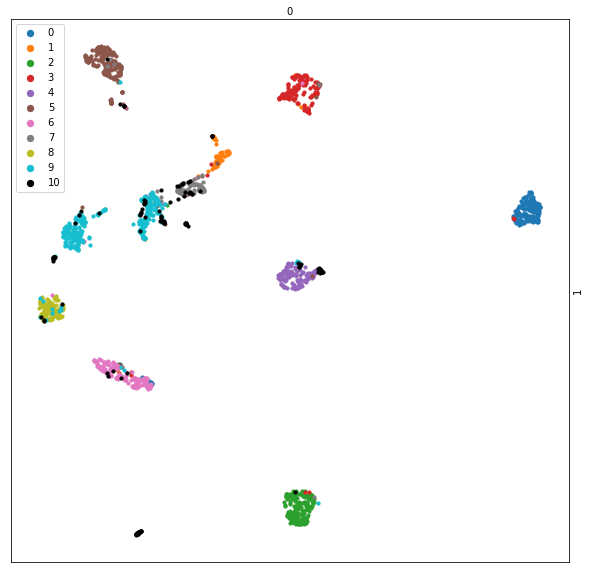

In [17]:
plt.figure(figsize=(10,10))
gater.plot_components(Y=Y, n_components=n_clusters, s=10)